# Bounding box detection - Racoon data


## Data files
- images_racoon.rar: contain images of racoons
- train_labels.cv: contains coordinates for bounding box for every image

### Import the necessary libraries

In [1]:
!git clone https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 33643, done.
remote: Total 33643 (delta 0), reused 0 (delta 0), pack-reused 33643
Receiving objects: 100% (33643/33643), 512.07 MiB | 33.44 MiB/s, done.
Resolving deltas: 100% (21525/21525), done.
Checking out files: 100% (3194/3194), done.


In [2]:
#Multiple folders including object_detection should exist in models/research folder
!ls -l models/research/

total 280
drwxr-xr-x  2 root root 4096 Jan 12 04:00 a3c_blogpost
drwxr-xr-x  2 root root 4096 Jan 12 04:00 adversarial_crypto
drwxr-xr-x  4 root root 4096 Jan 12 04:00 adversarial_logit_pairing
drwxr-xr-x  3 root root 4096 Jan 12 04:00 adversarial_text
drwxr-xr-x  2 root root 4096 Jan 12 04:00 adv_imagenet_models
drwxr-xr-x  2 root root 4096 Jan 12 04:00 astronet
drwxr-xr-x  3 root root 4096 Jan 12 04:00 attention_ocr
drwxr-xr-x  4 root root 4096 Jan 12 04:00 audioset
drwxr-xr-x  2 root root 4096 Jan 12 04:00 autoaugment
drwxr-xr-x  3 root root 4096 Jan 12 04:00 autoencoder
drwxr-xr-x  4 root root 4096 Jan 12 04:00 brain_coder
drwxr-xr-x 11 root root 4096 Jan 12 04:00 cognitive_mapping_and_planning
drwxr-xr-x  4 root root 4096 Jan 12 04:00 cognitive_planning
drwxr-xr-x  4 root root 4096 Jan 12 04:00 compression
drwxr-xr-x  7 root root 4096 Jan 12 04:00 cvt_text
drwxr-xr-x  3 root root 4096 Jan 12 04:00 deep_contextual_bandits
drwxr-xr-x  9 root root 4096 Jan 12 04:00 deeplab
drwxr-xr-x

In [3]:
!apt-get -qq install protobuf-compiler python-pil python-lxml python-tk
!pip install --user Cython  --quiet
!pip install --user contextlib2 --quiet
!pip install --user jupyter --quiet
!pip install --user matplotlib --quiet

Selecting previously unselected package python-bs4.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../0-python-bs4_4.6.0-1_all.deb ...
Unpacking python-bs4 (4.6.0-1) ...
Selecting previously unselected package python-pkg-resources.
Preparing to unpack .../1-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-chardet.
Preparing to unpack .../2-python-chardet_3.0.4-1_all.deb ...
Unpacking python-chardet (3.0.4-1) ...
Selecting previously unselected package python-six.
Preparing to unpack .../3-python-six_1.11.0-2_all.deb ...
Unpacking python-six (1.11.0-2) ...
Selecting previously unselected package python-webencodings.
Preparing to unpack .../4-python-webencodings_0.5-2_all.deb ...
Unpacking python-webencodings (0.5-2) ...
Selecting previously unselected package python-html5lib.
Preparing to unpack .../5-python-html5lib_0.999999999-1_all.deb ...
Unpacking pyt

In [4]:
#Move to models/research folder
%cd models/research

#Convert protobuf files to Python code using Protobuf compiler installed in previous step
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


In [5]:
#Change path to models/research and models/research/slim folders based on where you have cloned github repository above
%set_env PYTHONPATH=$PYTHONPATH:/content/models/research:/content/models/research/slim

env: PYTHONPATH=$PYTHONPATH:/content/models/research:/content/models/research/slim


In [6]:
#To be run from models/research folder
!python object_detection/builders/model_builder_test.py

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Running tests under Python 3.6.9: /usr/bin/python3
[ RUN      ] ModelBuilderTest.test_create_experimental_model
[       OK ] ModelBuilderTest.test_create_experimental_model
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[       OK ] ModelBuilderTest.test_create_faster_rcnn_model_from_config_with_example_miner
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[       OK ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_with_matmul
[ RUN      ] ModelBuilderTest.test_create_faster_rcnn_models_from_config_faster_rcnn_

### Change directory

In [7]:
#Come to the home directory
%cd /content

/content


In [9]:
#Create a folder for your project e.g in this case, pascal voc. You can choose any name for the folder 
!mkdir racoon

#Go to the project folder

%cd racoon

/content/racoon


### Load the training data from train.csv file

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp "/content/drive/My Drive/R10 Internal/download.rar" .

In [0]:
!cp "/content/drive/My Drive/R10 Internal/download.csv" .

In [21]:
!ls -l

total 25972
-rw------- 1 root root     7913 Jan 12 04:15 download.csv
-rw------- 1 root root 26574193 Jan 12 04:06 download.rar
drwxr-xr-x 3 root root    12288 Apr 22  2019 images


In [19]:

import patoolib
patoolib.extract_archive("download.rar", outdir="/content/racoon/")

     |████████████████████████████████| 81kB 3.8MB/s 
patool: Extracting download.rar ...
patool: running /usr/bin/unrar x -- /content/racoon/download.rar
patool:     with cwd='/content/racoon/'
patool: ... download.rar extracted to `/content/racoon/'.


'/content/racoon/'

In [22]:
import pandas as pd
df = pd.read_csv('download.csv')
df.head(5)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,raccoon-17.jpg,259,194,raccoon,95,60,167,118
1,raccoon-11.jpg,660,432,raccoon,3,1,461,431
2,raccoon-63.jpg,600,400,raccoon,74,107,280,290
3,raccoon-63.jpg,600,400,raccoon,227,93,403,298
4,raccoon-60.jpg,273,185,raccoon,58,33,197,127


### Print the shape of the train dataset

In [49]:
df['class'].value_counts()

raccoon    173
Name: class, dtype: int64

In [24]:
df.shape


(173, 8)

### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

In [0]:
IMAGE_SIZE = 128

In [0]:
#Download the model from zoo ......code not working
!wget -q http://download.tensorflow.org/models/object_detection/ssd_mbilenet_v1_coco_2018_01_28.tar.gz

In [0]:
!cp '/content/drive/My Drive/ACV - I/ssd_mobilenet_v1_coco_2018_01_28.tar.gz' . 

In [31]:
!ls -l

total 100720
-rw------- 1 root root     7913 Jan 12 04:15 download.csv
-rw------- 1 root root 26574193 Jan 12 04:06 download.rar
drwxr-xr-x 3 root root    12288 Apr 22  2019 images
-rw------- 1 root root 76541073 Jan 12 04:22 ssd_mobilenet_v1_coco_2018_01_28.tar.gz


In [32]:
#Extract tar file content
!tar -xvf ssd_mobilenet_v1_coco_2018_01_28.tar.gz

ssd_mobilenet_v1_coco_2018_01_28/
ssd_mobilenet_v1_coco_2018_01_28/model.ckpt.index
ssd_mobilenet_v1_coco_2018_01_28/checkpoint
ssd_mobilenet_v1_coco_2018_01_28/pipeline.config
ssd_mobilenet_v1_coco_2018_01_28/model.ckpt.data-00000-of-00001
ssd_mobilenet_v1_coco_2018_01_28/model.ckpt.meta
ssd_mobilenet_v1_coco_2018_01_28/saved_model/
ssd_mobilenet_v1_coco_2018_01_28/saved_model/saved_model.pb
ssd_mobilenet_v1_coco_2018_01_28/saved_model/variables/
ssd_mobilenet_v1_coco_2018_01_28/frozen_inference_graph.pb


In [33]:
!ls -l ssd_mobilenet_v1_coco_2018_01_28

total 58132
-rw-r--r-- 1 345018 5000       77 Feb  1  2018 checkpoint
-rw-r--r-- 1 345018 5000 29103956 Feb  1  2018 frozen_inference_graph.pb
-rw-r--r-- 1 345018 5000 27380740 Feb  1  2018 model.ckpt.data-00000-of-00001
-rw-r--r-- 1 345018 5000     8937 Feb  1  2018 model.ckpt.index
-rw-r--r-- 1 345018 5000  3006546 Feb  1  2018 model.ckpt.meta
-rw-r--r-- 1 345018 5000     4138 Feb  1  2018 pipeline.config
drwxr-xr-x 3 345018 5000     4096 Feb  1  2018 saved_model


In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
%matplotlib inline


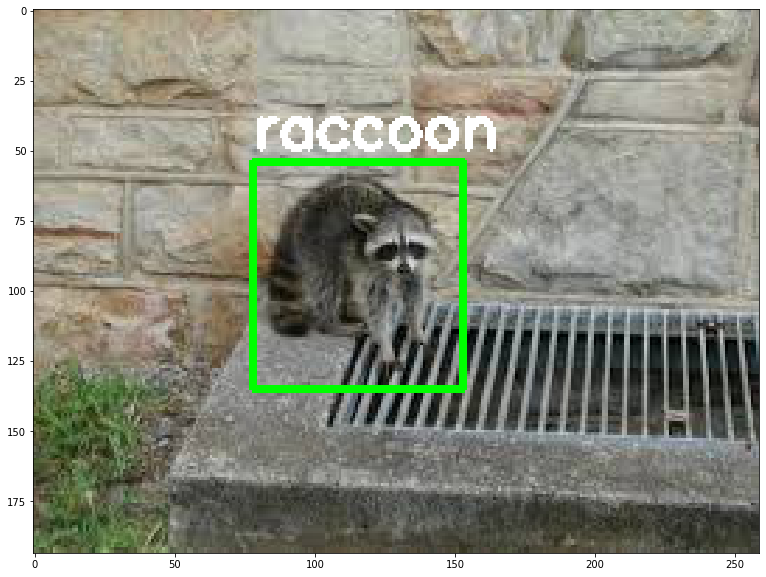

In [40]:
#Pickup a random image number
img_num = np.random.randint(0, df.shape[0])

#Read the image
img_file = df.loc[img_num,'filename']
img = cv2.imread('/content/racoon/images/' + img_file)

#Find all rows which have same file name
rows_with_file = df[df['filename'] == img_file].index.tolist()

#Draw rectangle(s) as per bounding box information
for i in rows_with_file:

    #Get bounding box
    xmin, ymin, xmax, ymax = df.loc[i, ['xmin', 'ymin', 'xmax', 'ymax']]
    #Get Label
    label = df.loc[i, 'class']
    #Add bounding box
    cv2.rectangle(img, (xmin,ymin), (xmax, ymax), (0,255,0), 2)
    #Add text
    cv2.putText(img,label,(xmin, ymin-5),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

In [0]:
import csv
with open('download.csv','r') as csvfile:
    paths = []
    coords = np.zeros((sum(1 for line in csvfile) - 1, 4))
    spamreader = csv.reader(csvfile, delimiter=',')
    csvfile.seek(0)
    next(spamreader, None)
    for i,row in enumerate(spamreader):
        #print(row)
        for j, r in enumerate(row): # Parse row with seven entities
            #print(i)
            if((j!= 0) & (j!=3)):
                row[j] = int(r)
            
        #print(row)      
        path, width, height, class_, xmin, ymin, xmax, ymax = row
        paths.append(path)
        #print(i)
        coords[i,0] = xmin * IMAGE_SIZE / width
        coords[i,1] = ymin * IMAGE_SIZE / height
        coords[i,2] = xmax * IMAGE_SIZE / width # Normalize bounding box by image size
        coords[i,3] = ymax * IMAGE_SIZE / height

In [52]:
paths

['raccoon-17.jpg',
 'raccoon-11.jpg',
 'raccoon-63.jpg',
 'raccoon-63.jpg',
 'raccoon-60.jpg',
 'raccoon-69.jpg',
 'raccoon-180.jpg',
 'raccoon-200.jpg',
 'raccoon-141.jpg',
 'raccoon-19.jpg',
 'raccoon-84.jpg',
 'raccoon-124.jpg',
 'raccoon-182.jpg',
 'raccoon-111.jpg',
 'raccoon-91.jpg',
 'raccoon-79.jpg',
 'raccoon-93.jpg',
 'raccoon-20.jpg',
 'raccoon-42.jpg',
 'raccoon-139.jpg',
 'raccoon-58.jpg',
 'raccoon-71.jpg',
 'raccoon-183.jpg',
 'raccoon-1.jpg',
 'raccoon-169.jpg',
 'raccoon-82.jpg',
 'raccoon-4.jpg',
 'raccoon-101.jpg',
 'raccoon-10.jpg',
 'raccoon-166.jpg',
 'raccoon-184.jpg',
 'raccoon-38.jpg',
 'raccoon-120.jpg',
 'raccoon-142.jpg',
 'raccoon-149.jpg',
 'raccoon-51.jpg',
 'raccoon-43.jpg',
 'raccoon-123.jpg',
 'raccoon-66.jpg',
 'raccoon-9.jpg',
 'raccoon-178.jpg',
 'raccoon-47.jpg',
 'raccoon-167.jpg',
 'raccoon-54.jpg',
 'raccoon-77.jpg',
 'raccoon-155.jpg',
 'raccoon-89.jpg',
 'raccoon-153.jpg',
 'raccoon-179.jpg',
 'raccoon-115.jpg',
 'raccoon-64.jpg',
 'raccoon-56

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

In [0]:

from keras.applications.mobilenet import preprocess_input

In [64]:
len(paths)

173

In [0]:
batch_images = np.zeros(shape=(len(paths), IMAGE_SIZE, IMAGE_SIZE, 3)).astype('float32')

In [70]:
batch_images.shape

(173, 128, 128, 3)

In [0]:
import cv2
from PIL import Image

In [0]:
for i,x in enumerate(paths):
  img = Image.open("/content/racoon/images/" + x)
  img = img.resize((IMAGE_SIZE,IMAGE_SIZE))
  img = img.convert('RGB')
  batch_images[i] = preprocess_input(np.array(img,dtype=np.float32))

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3. Freeze all the layers. Add convolution and reshape layers at the end to ensure the output is 4 coordinates

In [0]:
from keras.applications.mobilenet import MobileNet 
model = MobileNet(include_top=False,input_shape=(IMAGE_SIZE,IMAGE_SIZE, 3),alpha = 1.0)

In [0]:
x = model.output

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
from keras.layers import Conv2D

In [0]:
x = Conv2D(4,kernel_size=4)(x)


In [0]:
x = Reshape((4,))(x)

In [0]:
from keras.models import Model
from keras.layers import Reshape


In [0]:
model = Model(inputs=model.input, outputs=x)

### Define a custom loss function IoU which calculates Intersection Over Union

In [0]:
from keras.backend import epsilon

In [0]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [158]:
model.compile(optimizer='adam', 
                    loss='mse',
                    metrics=[IoU])

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


In [160]:
model.fit(batch_images,coords,batch_size=32,epochs=30,verbose=1)



Epoch 1/30
173/173 [==============================] - 6s 32ms/step - loss: 4353.3888 - IoU: 0.0558
Epoch 2/30
173/173 [==============================] - 4s 26ms/step - loss: 1007.9462 - IoU: 0.3519
Epoch 3/30
173/173 [==============================] - 4s 26ms/step - loss: 426.1549 - IoU: 0.5682
Epoch 4/30
173/173 [==============================] - 4s 25ms/step - loss: 635.7846 - IoU: 0.5308
Epoch 5/30
173/173 [==============================] - 4s 26ms/step - loss: 446.3671 - IoU: 0.5864
Epoch 6/30
173/173 [==============================] - 4s 26ms/step - loss: 236.6406 - IoU: 0.6481
Epoch 7/30
173/173 [==============================] - 4s 26ms/step - loss: 206.0549 - IoU: 0.6479
Epoch 8/30
173/173 [==============================] - 4s 25ms/step - loss: 193.3256 - IoU: 0.6637
Epoch 9/30
173/173 [==============================] - 4s 26ms/step - loss: 155.3316 - IoU: 0.7058
Epoch 10/30
173/173 [==============================] - 4s 26ms/step - loss: 140.6144 - IoU: 0.7266
Epoch 11/30
173

### Pick a test image from the given data

In [0]:
img_num = np.random.randint(0,df.shape[0])
img_file = paths[img_num]


In [189]:
img_file

'raccoon-91.jpg'

In [0]:
import cv2
image_name = '/content/racoon/images/'+img_file


In [191]:
image_name

'/content/racoon/images/raccoon-91.jpg'

In [0]:
unscaled = cv2.imread(image_name) # Original image for display

In [193]:
unscaled.shape

(314, 236, 3)

### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

In [0]:
image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network

### Predict the coordinates of the bounding box for the given test image

In [0]:
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))
region = model.predict(x=np.array([feat_scaled]))[0] # Predict the BBox

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

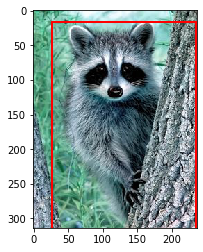

In [196]:
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[3]) * image_height / IMAGE_SIZE)


import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()